In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from read_HiC import name_chromosomes
from read_HiC import MiddlePointLoci
from read_HiC import Map_Topology_to_Structure
import pandas as pd
import seaborn as sns
import hicstraw
import os
pd.options.mode.chained_assignment = None  # default='warn'

import sys
path='/Users/jialechen/Desktop/PhD/CT/Pang_2022_GenomeBiol_3D/functions/'
sys.path.append(path)

from plotting_tools import set_layout
from plotting_tools import save_figures
from genome_topology import normalize_psc
from genome_topology import get_matrix
from genome_topology import normalize_psc
from statistical_analysis import correlate
from matrix_analysis import Select_entangled_fraction

In [19]:
#Create plot above heatmap
def plot_over_map(data,avg, ax, ax_histx, stats):
    data=data.transpose()
    label = 'Corr = {}\np = {}'.format(stats[0], stats[1])
    ax_histx.tick_params(axis="x", labelbottom=False)
    cmap = sns.color_palette("flare", as_cmap=True)
    sns.heatmap(data, cmap=cmap, ax=ax)
    ax_histx.plot(avg, label = label)

    ax_histx.legend()
    return 0

#Creates plot made by two rectangles
def plot_rectangle(avg, data, params, stats):
    #left, width, bottom, height, spacing,
    rect_scatter = [params[0], params[2], params[1], params[3]]
    rect_histx = [params[0], params[2] + params[3] + params[4], params[1]-0.22, 0.2]
   
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_axes(rect_scatter)
    ax.set_xlabel('Mb')
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    plot_over_map(data,avg, ax, ax_histx, stats)
    ax_histx.legend(bbox_to_anchor=(1.0, 1.0))

    #plt.title('{}, after 2 us'.format(label))
    return fig

## COUPLE RNAseq DATA TO ENTANGLED FRACTION FROM POPULATION Hi-C CONTACT LISTS

In this notebook we calculate the correlation between binned gene abundance data and entanglement traces calculated from population Hi-C contact lists. In order to do so, we create a binning for the entanglement fraction, which is the same used to bin gene abundance data:
- We calculate CT topology matrix from Hi-C population data
- We sum the entangled topology fraction for all contacts in a bin (based on the position of the first contact site)
- We calculate the correlation between gene abundance and entangled trace
- We plot the gene abundance and entangled trace as a double plot (heatmap + plot)

Load Hi-C population data

In [20]:
file='GSM6081072_Cell_ID_19.hic'
contacts=pd.read_csv('/Users/jialechen/Desktop/PhD/CT/Pang_2022_GenomeBiol_3D/data/{}.txt'.format(file), sep= '\t' )

n_all_chr=23
chr_vec=name_chromosomes(n_all_chr)
set_layout()

Select parameters for analysis, and path for saving figures

In [21]:
#Threshold for Hi-C counts
likelihood_thresh= 0
Mode_Binning_entangledTrace = 'Sum'

#Resolution binning
resolution_string='resolution 1Mb'

#pick threshold for rna-seq gene abundance
thresh_abundance=50

#Parameters for the plot
left, width = 0.1, 1.1
bottom, height = 0.1, 0.07
spacing = 0.005
params= [left, width,bottom, height,spacing]

#Path for figures:
savefig=False
path_figures='results/figures'

Calculate the correlation between binned gene abundance data and entanglement traces

/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 0: corr= nan, p= nan


/Users/jialechen/Desktop/PhD/CT/Pang_2022_GenomeBiol_3D/functions/statistical_analysis.py:83: RuntimeWarning: overflow encountered in cast
  var2=np.asarray(var2.astype(np.float16))
/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 1: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 2: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 3: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 4: corr= nan, p= nan
Chromosome 5: corr= -0.11, p= 0.167


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 6: corr= nan, p= nan


/Users/jialechen/Desktop/PhD/CT/Pang_2022_GenomeBiol_3D/functions/statistical_analysis.py:83: RuntimeWarning: overflow encountered in cast
  var2=np.asarray(var2.astype(np.float16))
/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 7: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 8: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 9: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 10: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 11: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 12: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 13: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 14: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 15: corr= nan, p= nan
Chromosome 16: corr= -0.09, p= 0.416


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 17: corr= nan, p= nan
Chromosome 18: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/var/folders/dp/dd_rnstn2flf9syvmjtgd7400000gn/T/ipykernel_48160/3247478515.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(12, 4))


Chromosome 19: corr= nan, p= nan
Chromosome 20: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 21: corr= nan, p= nan


/Users/jialechen/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Chromosome 22: corr= nan, p= nan


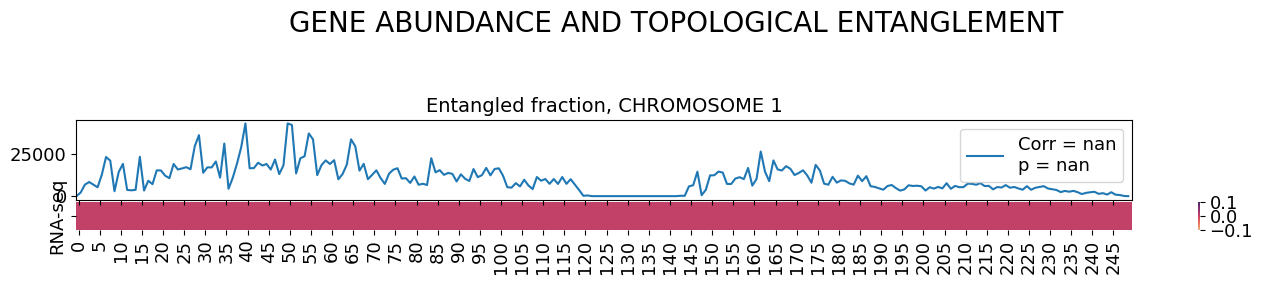

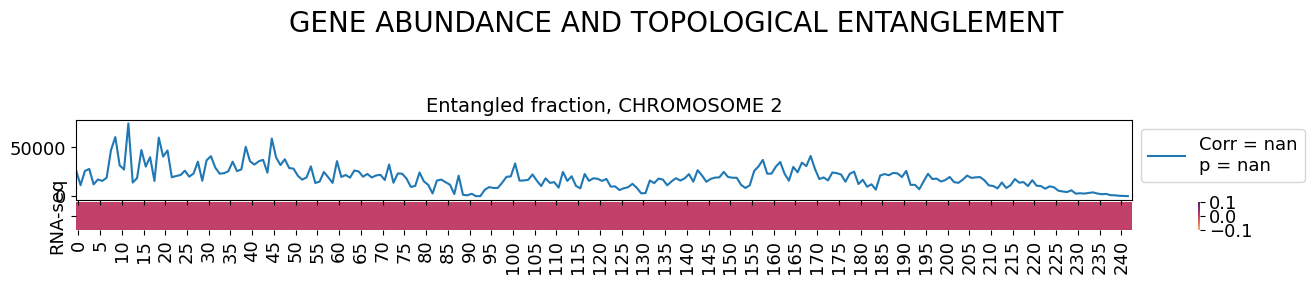

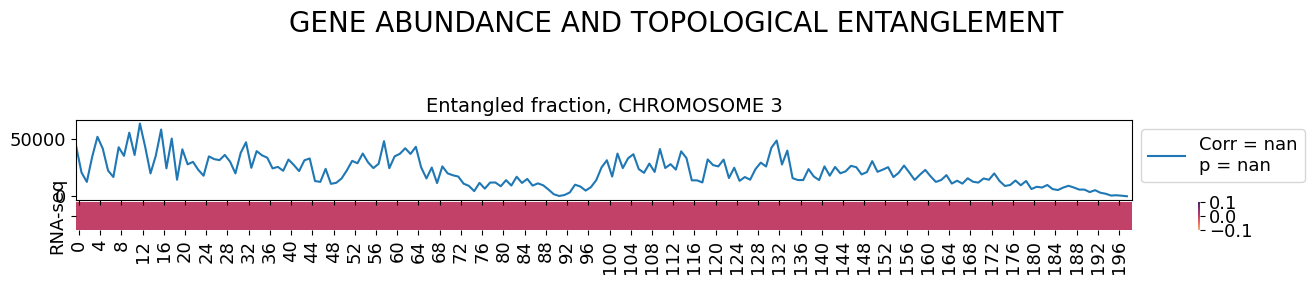

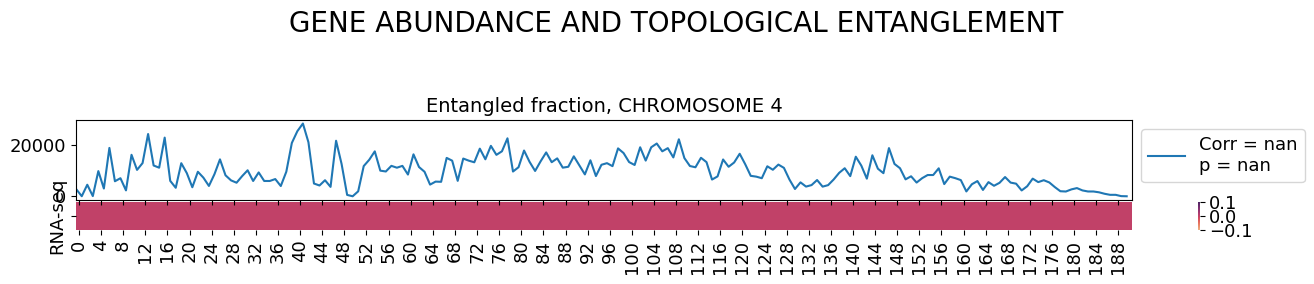

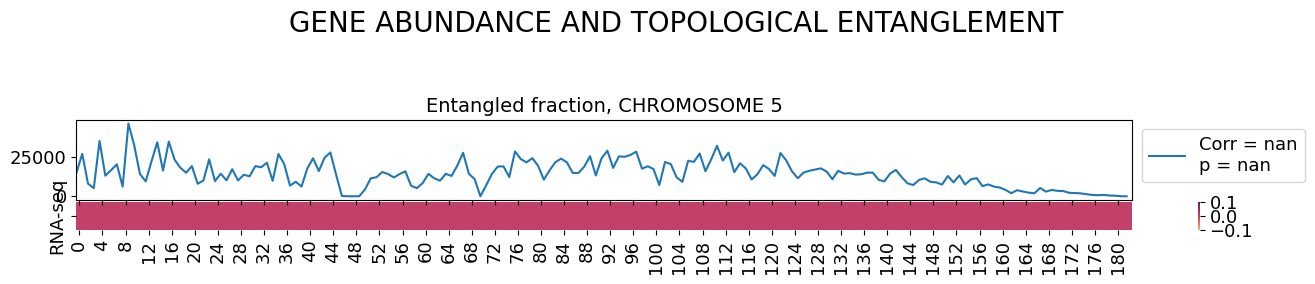

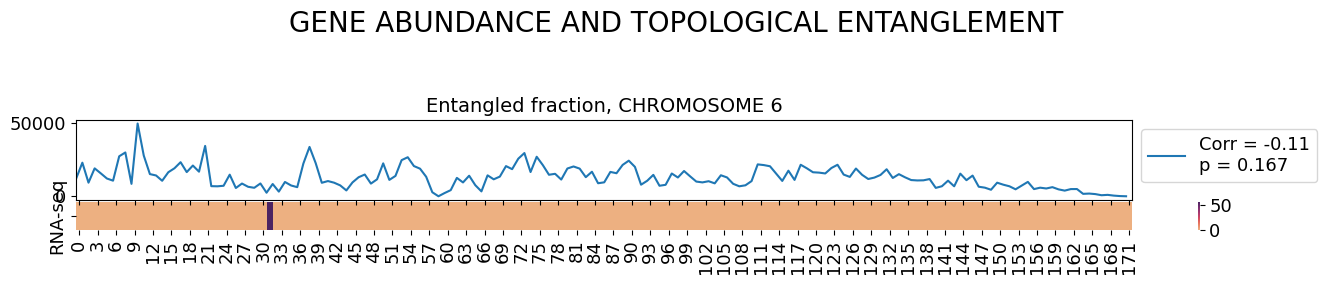

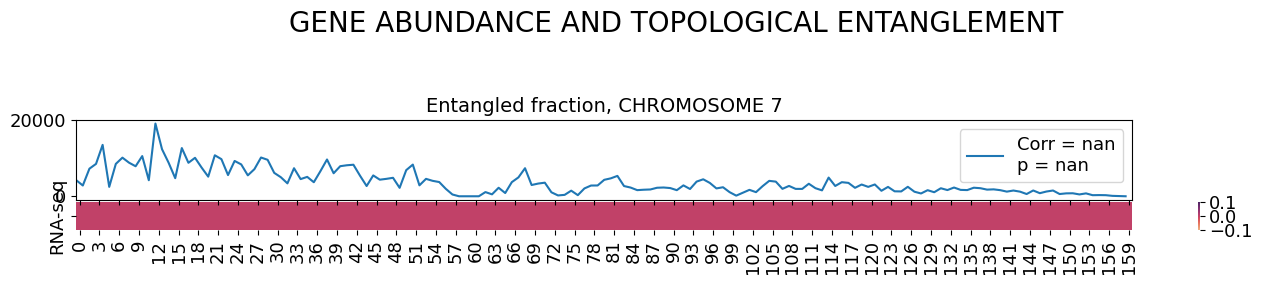

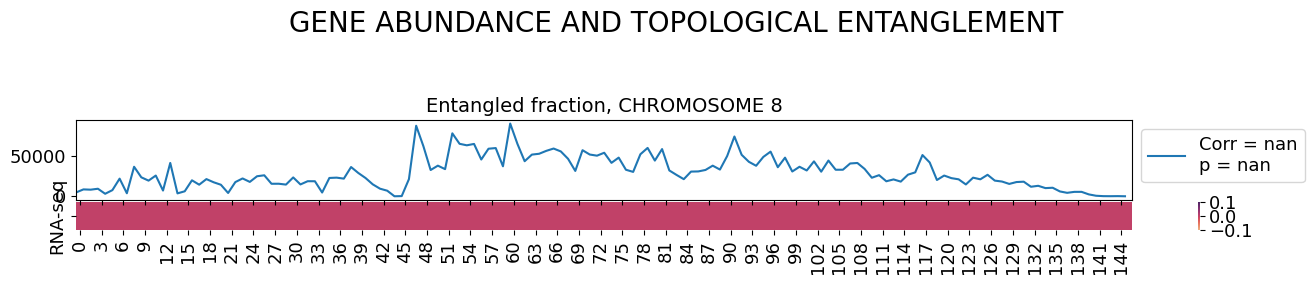

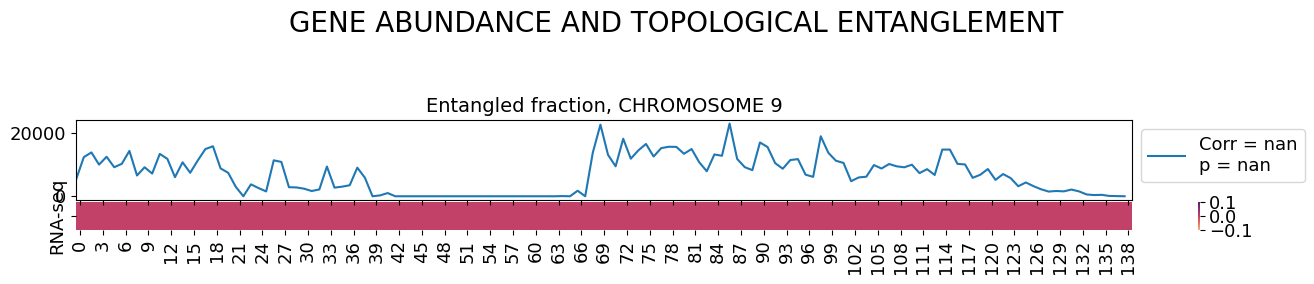

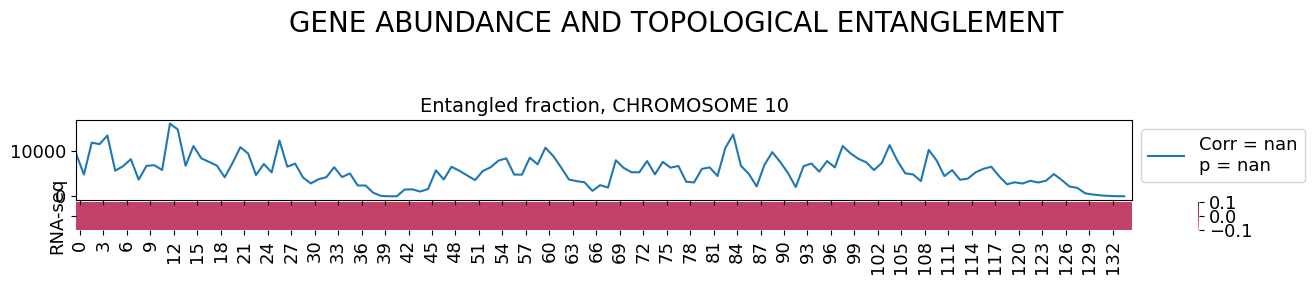

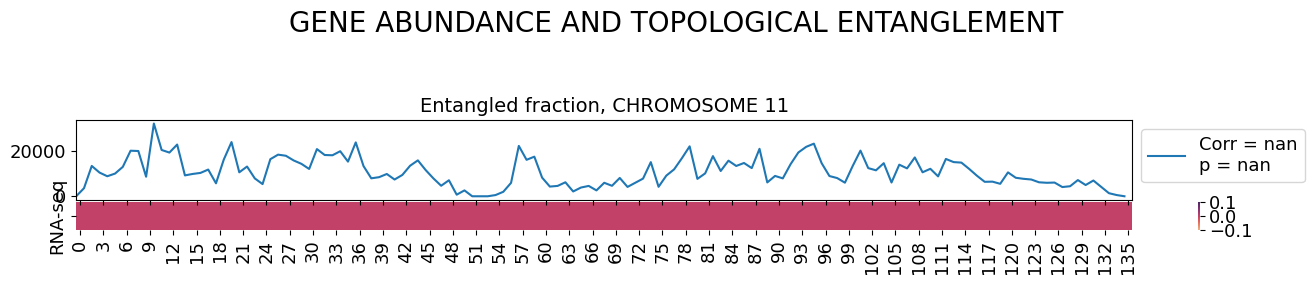

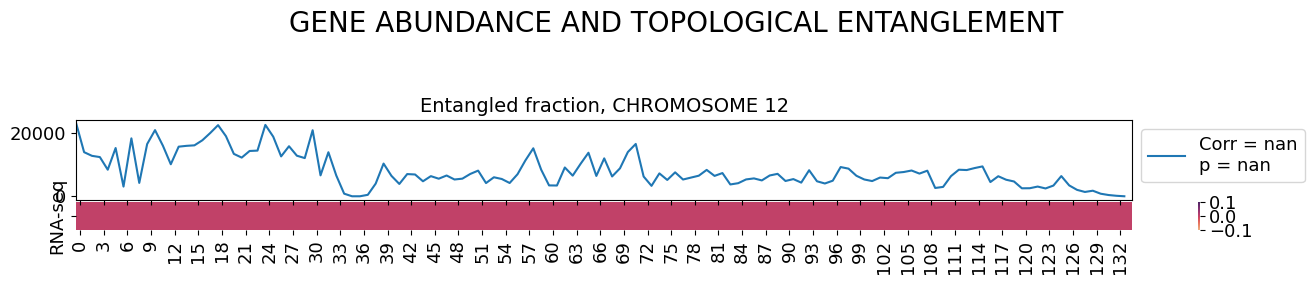

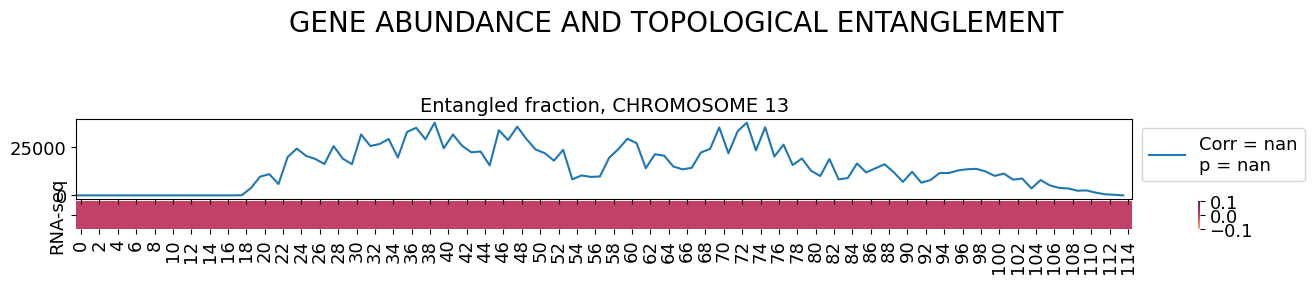

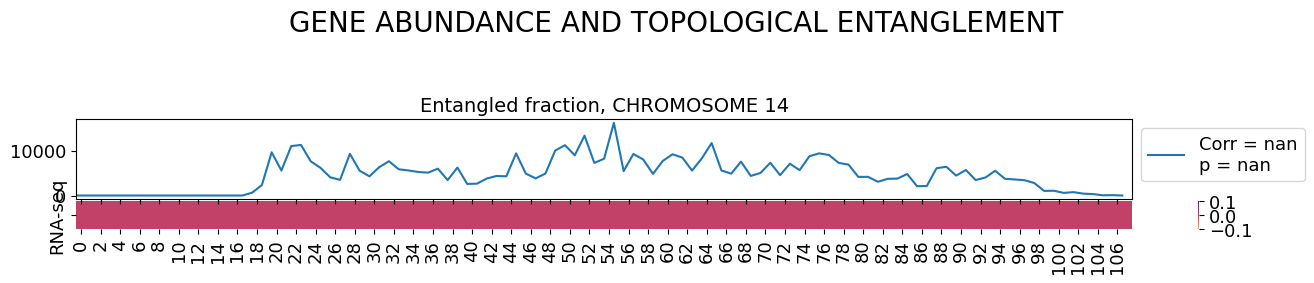

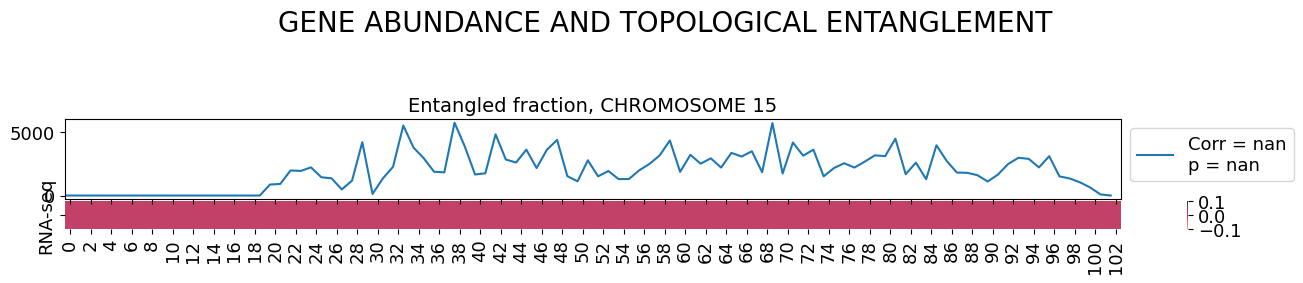

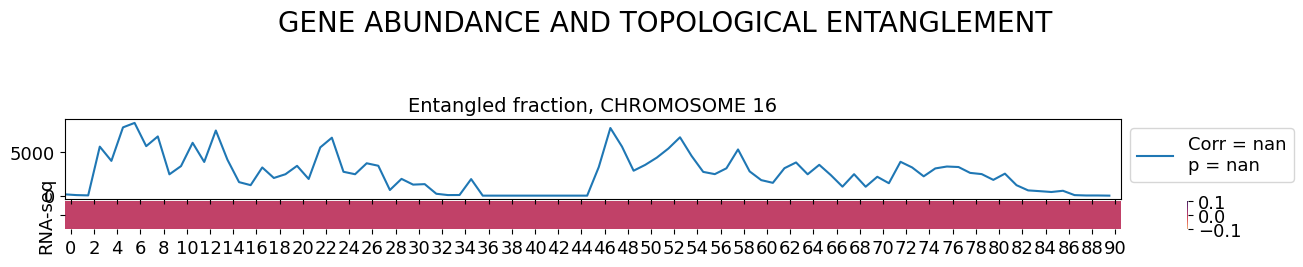

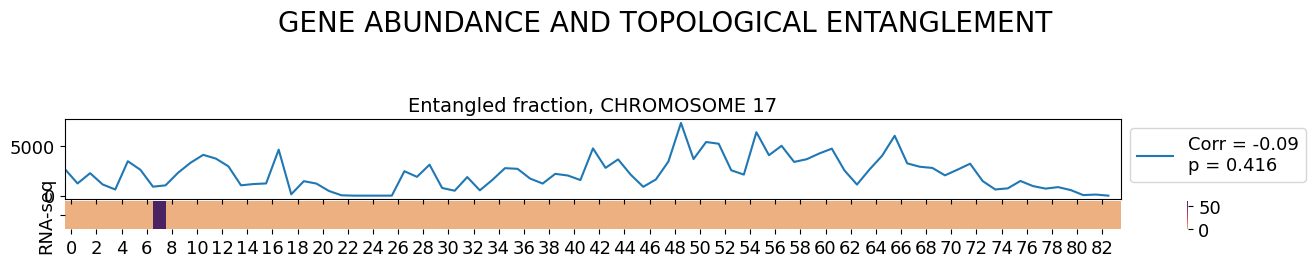

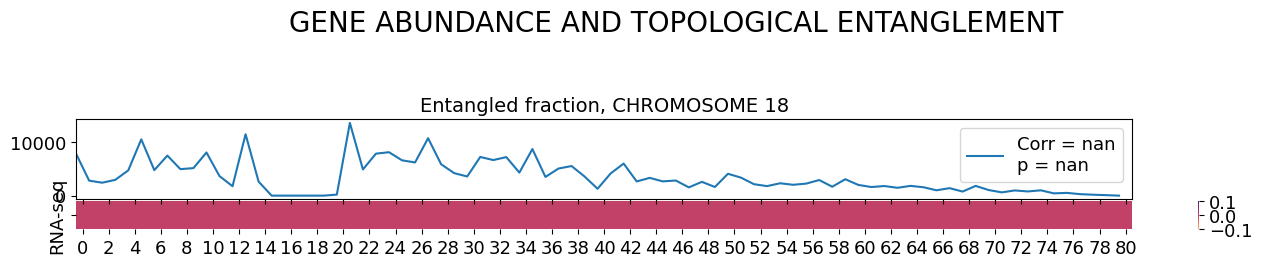

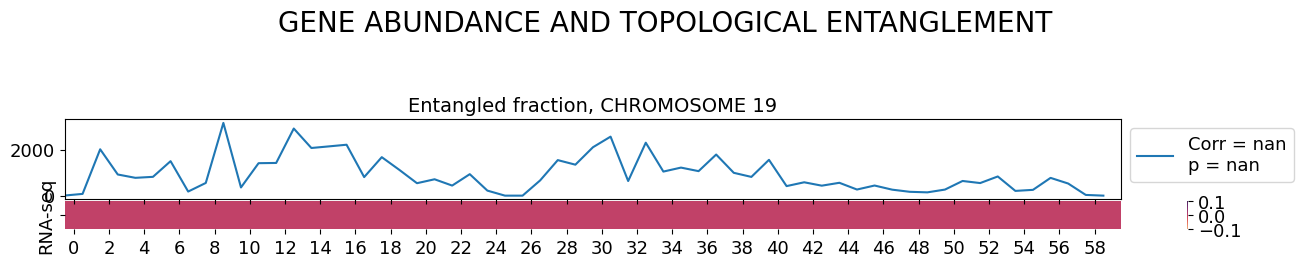

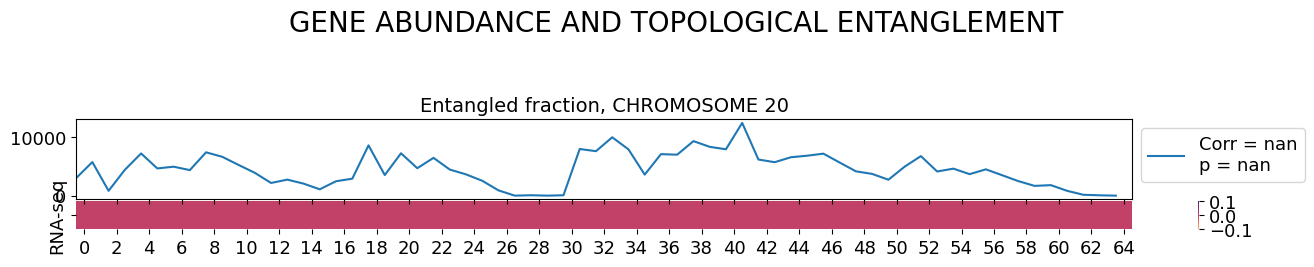

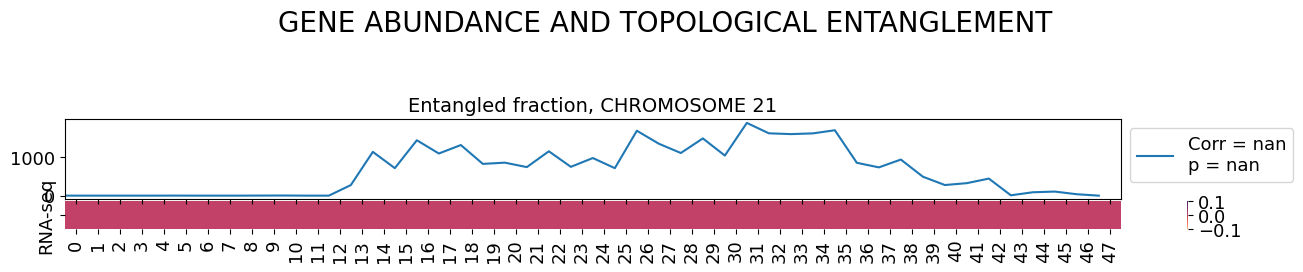

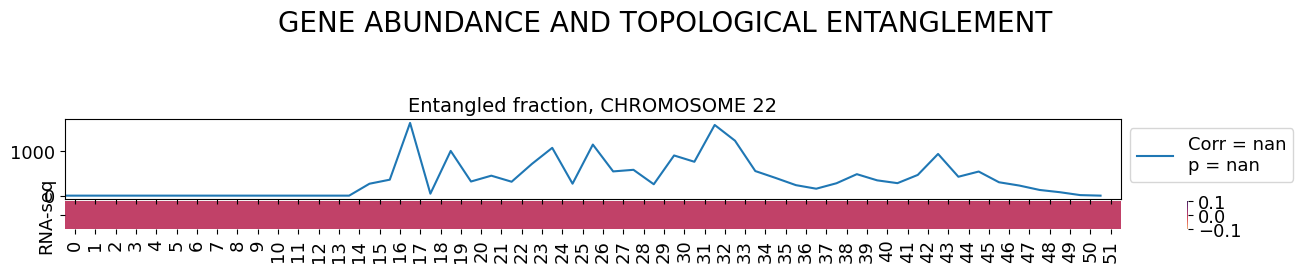

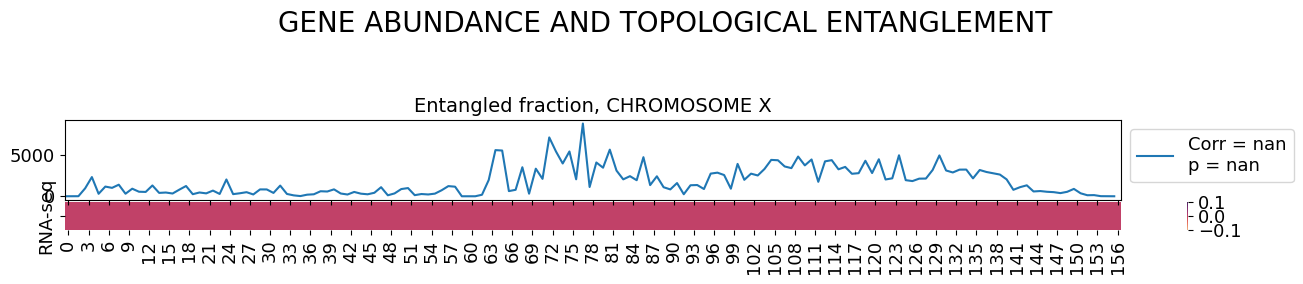

In [22]:
#Define variables to fill in the loop
correlation=np.zeros(n_all_chr)
pvalues=np.zeros(n_all_chr)


for chr_n, chrom in enumerate(chr_vec):
    
    #Load gene abundance data
    abundance = pd.read_csv('/Users/jialechen/Desktop/PhD/CT/Pang_2022_GenomeBiol_3D/data/rna data/binned abundance/{}/'\
                            'abundance_{}.csv'.format(resolution_string, chrom))
    bins= abundance['Bins']
    abundance_high= np.copy(abundance['Abundance'])

    #filter for high abundance
    abundance_high[abundance_high< thresh_abundance]=0
    abundance['Highly expressed']= abundance_high
    
    #Filter likely single chromosome contacts
    contacts_chr= contacts[(contacts['#chr_A']== chrom) & (contacts['chr_B']== chrom)]
    contacts_chr=MiddlePointLoci(contacts_chr)
    likely_contacts_chr=contacts_chr[contacts_chr['num_obs']>=likelihood_thresh]
    
    #Calculate topology
    index= np.array([likely_contacts_chr['index A'], likely_contacts_chr['index B']])
    index= np.transpose(index)
    mat, psc = get_matrix(index, chrom)
    mat = Select_entangled_fraction(mat)
    likely_contacts_chr['Matrix trace']= np.sum(mat, axis=1)
    
    #Map topology matrix trace to genome structure
    trace_structure = Map_Topology_to_Structure(likely_contacts_chr, bins,  
                                                mode = Mode_Binning_entangledTrace)
    
    #Calculate correlation between topology trace and RNA-seq data
    corr, pvalue = correlate(abundance['Highly expressed'],trace_structure)
    correlation[chr_n]=corr
    pvalues[chr_n]=pvalue
    print('Chromosome {}: corr= {}, p= {}'.format(chr_n, corr, pvalue))

    #Plot double graph: topology trace and RNA-seq data
    stats = [corr, pvalue]
    data = {'RNA-seq': abundance['Highly expressed']}
    data=pd.DataFrame(data)
    f= plot_rectangle(trace_structure, data, params, stats)
    plt.suptitle('GENE ABUNDANCE AND TOPOLOGICAL ENTANGLEMENT',y=0.65, x=0.6)
    plt.title('Entangled fraction, CHROMOSOME {}'.format(chrom[3:]))
    
    if savefig:
        name_fig='DoublePlot_{}'.format(chrom)
        save_figures(f,path_figures, name_fig, 
        method='{}_{}_{}'.format(likelihood_thresh,Mode_Binning_entangledTrace, thresh_abundance))

# Define the directory path
output_dir = 'results/correlation rna seq/{}/'.format(resolution_string)

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save correlation data
df = {'Chromosome': chrom, 'Correlation': correlation, 'Pvalue': pvalues}
df = pd.DataFrame(df)
df.to_csv(output_dir + 'correlation_{}_{}_{}.csv'.format(
    likelihood_thresh, Mode_Binning_entangledTrace, thresh_abundance))